In [1]:
import pyBigWig
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bw = pyBigWig.open("/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/HEPG2/nautilus_runs_jun16/HEPG2_05.09.2022_bias_128_4_1234_0.8_fold_0/interpret/merged.HEPG2.counts.bw")

In [16]:
#chr14:22589163-22589770
vals = np.nan_to_num(bw.values("chr14",22589163,22589770))

In [17]:
kernel_size = 5
kernel = np.ones(kernel_size) / kernel_size
vals = np.convolve(vals, kernel, mode='valid')


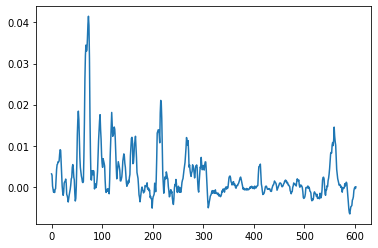

In [18]:
plt.plot(vals)

In [19]:
from scipy import signal

In [20]:
peakind = signal.find_peaks_cwt(vals, np.arange(6,20))

In [21]:
peakind

array([ 16,  72, 122, 163, 215, 268, 301, 354, 374, 412, 488, 558])

In [22]:
from scipy.signal import find_peaks, peak_prominences

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: PeakPropertyWarning: some peaks have a prominence of 0
  This is separate from the ipykernel package so we can avoid doing imports until


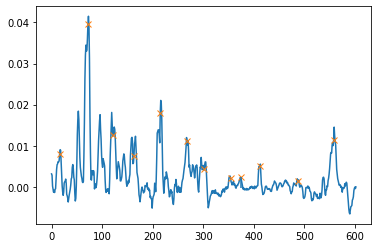

In [23]:
x = vals
peaks = peakind
prominences = peak_prominences(x, peaks)[0]
contour_heights = x[peaks] - prominences
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=contour_heights, ymax=x[peaks])
#plt.xlim((0,200))
plt.show()